In [4]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Boehm Scenario 4

Fig. 7 f) Inferred ANN vs missing observable mapping.
- problem ID `boehm_observable_ab_ratio`
- UDE # 923 without regularisation
- UDE # 1771 with regularisation

In [5]:
data_ref_without = pd.read_csv("Fig7/sim_inferred_reference/2024_11_20_Boehm_observable_ab_ratio_923_ground_truth_based.csv")
data_ude_without = pd.read_csv("Fig7/sim_inferred_reference/2024_11_20_Boehm_observable_ab_ratio_923_nn_based.csv")

data_ref_reg = pd.read_csv("Fig7/sim_inferred_reference/2024_11_20_Boehm_observable_ab_ratio_1771_ground_truth_based.csv")
data_ude_reg = pd.read_csv("Fig7/sim_inferred_reference/2024_11_20_Boehm_observable_ab_ratio_1771_nn_based.csv")

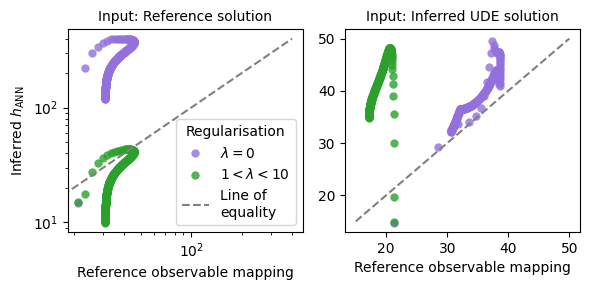

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(6, 3))

marker = {
    "linestyle": "none",
    "marker": "o",
    "markersize": 6,
    # "markerfacecolor": "w",
    'alpha': 0.8,
    'markeredgecolor': 'none',
}

# No regularisation

# ax[1].plot(data_ude_without['ode_sim'], data_ude_without['nn_pred'], color="lavender")
ax[1].plot(data_ude_without['ode_sim'], data_ude_without['nn_pred'], color="mediumpurple", **marker, label="$\lambda = 0$")

# ax[0].plot(data_ref_without['ode_sim'], data_ref_without['nn_pred'], color="lavender")
ax[0].plot(data_ref_without['ode_sim'], data_ref_without['nn_pred'], color="mediumpurple", **marker, label="$\lambda = 0$")

# With regularisation

# ax[1].plot(data_ude_reg['ode_sim'], data_ude_reg['nn_pred'], color="palegreen")
ax[1].plot(data_ude_reg['ode_sim'], data_ude_reg['nn_pred'], color="tab:green", **marker, label="$1 < \lambda < 10$")

# ax[0].plot(data_ref_reg['ode_sim'], data_ref_reg['nn_pred'], color="palegreen")
ax[0].plot(data_ref_reg['ode_sim'], data_ref_reg['nn_pred'], color="tab:green", **marker, label="$1 < \lambda < 10$")

ax[0].plot([0, 400], [0, 400], "grey", linestyle="dashed", label="Line of\nequality")
ax[1].plot([15, 50], [15, 50], "grey", linestyle="dashed", label="Line of\nequality")
ax[0].set_xscale("log")
ax[0].set_yscale("log")

ax[0].legend(title="Regularisation")
ax[0].set_title("Input: Reference solution", fontsize="medium")
ax[1].set_title("Input: Inferred UDE solution", fontsize="medium")

for axis in ax:
    axis.set_xlabel("Reference observable mapping")
ax[0].set_ylabel("Inferred $h_{\\text{ANN}}$")

fig.tight_layout()
fig.savefig("Fig7/residuals.svg", transparent=True)

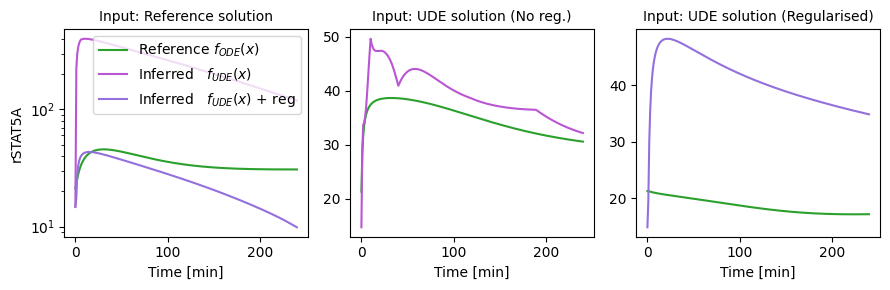

In [7]:
# time trajectory
fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharey=False)

ax = axes[0]
ax.set_title("Input: Reference solution", fontsize="medium")
ax.plot(data_ref_without["ode_sim"], color="tab:green", label="Reference $f_{ODE}(x)$")
ax.plot(data_ref_without["nn_pred"], color="mediumorchid", label="Inferred   $f_{UDE}(x)$")
ax.plot(data_ref_reg["nn_pred"], color="mediumpurple", label="Inferred   $f_{UDE}(x)$ + reg")
ax.set_yscale("log")
ax.set_xlabel("Time [min]")
ax.set_ylabel("rSTAT5A")
ax.legend(loc="upper right")

ax = axes[1]
ax.set_title("Input: UDE solution (No reg.)", fontsize="medium")
ax.plot(data_ude_without["ode_sim"], color="tab:green", label="Reference $f_{ODE}$")
ax.plot(data_ude_without["nn_pred"], color="mediumorchid", label="Inferred $f_{UDE}$")
ax.set_xlabel("Time [min]")

ax = axes[2]
ax.set_title("Input: UDE solution (Regularised)", fontsize="medium")
ax.plot(data_ude_reg["ode_sim"], color="tab:green", label="Reference $f_{ODE}$")
ax.plot(data_ude_reg["nn_pred"], color="mediumpurple", label="Inferred $f_{UDE}$ + reg")
ax.set_xlabel("Time [min]")

fig.tight_layout()
fig.savefig("Fig7/observable_trajectories.svg", transparent=True)